### install

In [1]:
# !pip install JPype1
# !pip install konlpy

In [1]:
import pandas as pd

# 형태소분석
from konlpy.tag import Okt

# 갯수카운트
from collections import Counter

# 그래프 그릴때
import matplotlib
import matplotlib.pyplot as plt

# 폰트
matplotlib.rcParams["font.family"] = "Malgun Gothic"

# 워드클라우드 
import numpy as np
from PIL import Image
from wordcloud import WordCloud

### 엑셀에서 df가져오기

In [5]:
##### 쇼핑에서 가져올 때 #####

file = ['네이버쇼핑_IT.xlsx',
        '네이버쇼핑_경제.xlsx',
        '네이버쇼핑_여행.xlsx',
        '네이버쇼핑_취미.xlsx']
dfname=['it','경제','여행','취미']

for name,i in zip(file,dfname):
    df_sh = pd.read_excel(f'./bookData/{name}', engine='openpyxl', header = None, names=['도서명','분류1','분류2'])
    globals()['df_sh_{}'.format(i)]=df_sh

# df_sh_hobby = pd.read_excel('네이버쇼핑_취미.xlsx', engine='openpyxl', header = None, names=['도서명','분류1','분류2'])
df_sh_it

,도서명,분류1,분류2
0,한정희 된다 7일 실무 엑셀 [이지스퍼블리싱],오피스활용도서,MS Excel
1,"파이썬 머신러닝 완벽 가이드 / 위키북스 (책,도서)",프로그래밍 언어,NaN
2,윤성우의 열혈 c 프로그래밍 책 윤성우 오렌지미디어,프로그래밍 언어,NaN
3,영상 편집을 위한 프리미어 프로 제이펍,그래픽/멀티미디어,그래픽일반/자료집
4,do it 점프 투 파이썬 / 이지스퍼블리싱 책,프로그래밍 언어,NaN
...,...,...,...
495,autocad 2010 쉽게 배우기 책 (영진닷컴),그래픽/멀티미디어,그래픽툴/저작툴
496,자바스크립트 패턴과 테스트,프로그래밍 언어,NaN
497,이상만 (메카피아) 솔리드웍스 정적구조 공학해석 실무 책,그래픽/멀티미디어,그래픽툴/저작툴
498,sql server로 배우는 데이터베이스 개론과 실습 책 (한빛아카데미),OS/데이터베이스,NaN


In [3]:
##### 베스트셀러에서 df #####

# 
file2 = ['교보문고_종합 베스트_연간_2018년_경제경영202201171730.xlsx',
        '교보문고_종합 베스트_연간_2018년_기술_컴퓨터202201171729.xlsx',
        '교보문고_종합 베스트_연간_2018년_여행202201171730.xlsx',
        '교보문고_종합 베스트_연간_2018년_취미_스포츠202201171733.xlsx',
        '교보문고_종합 베스트_연간_2019년_경제경영202201171730.xlsx',
        '교보문고_종합 베스트_연간_2019년_기술_컴퓨터202201171729.xlsx',
        '교보문고_종합 베스트_연간_2019년_여행202201171730.xlsx',
        '교보문고_종합 베스트_연간_2019년_취미_스포츠202201171732.xlsx',
        '교보문고_종합 베스트_연간_2020년_경제경영202201171730.xlsx',
        '교보문고_종합 베스트_연간_2020년_기술_컴퓨터202201171730.xlsx',
        '교보문고_종합 베스트_연간_2020년_여행202201171729.xlsx',
        '교보문고_종합 베스트_연간_2020년_취미_스포츠202201171730.xlsx',
        '교보문고_종합 베스트_연간_2021년_경제경영202201171729.xlsx',
        '교보문고_종합 베스트_연간_2021년_기술_컴퓨터202201171730.xlsx',
        '교보문고_종합 베스트_연간_2021년_분야_종합202201171707.xlsx',
        '교보문고_종합 베스트_연간_2021년_여행202201171729.xlsx',
        '교보문고_종합 베스트_연간_2021년_취미_스포츠202201171727.xlsx',
        '교보문고_종합 베스트_연간_2020년_분야_종합202201191022.xlsx',
        '교보문고_종합 베스트_연간_2019년_분야_종합202201191022.xlsx',
        '교보문고_종합 베스트_연간_2018년_분야_종합202201191022.xlsx']

# file2에서 df파일명 만듦
dfname2=[]
for i in range(len(file2)):
    dfname2.append(file2[i].replace('교보문고_종합 베스트_연간_','').split('2022')[0])


for name,i in zip(file2,dfname2):
    df_best = pd.read_excel(f'./bookData/{name}', engine='openpyxl',header=1)
    df_best.drop([0], inplace = True)
    globals()['df_best{}'.format(i)]=df_best
    


'''
# 경로는 맞게 수정해야함
df_best2021_hobby = pd.read_excel('C:/Users/sw/Desktop/2nd Project/bookData/교보문고_종합 베스트_연간_2021년_취미_스포츠202201171727.xlsx', engine='openpyxl',header=1)

# 무의미한 데이터행 삭제
df_best2021_hobby.drop([0], inplace = True)
# 인덱스 초기화
# df_best2021_hobby.reset_index(inplace = True)
# df_best2021_hobby[:5]
'''
df_best2018년_분야_종합

,순위,ISBN,도서명,저자명,출판사명,출간일,분야,정가
1,1,9.788926e+12,"곰돌이 푸, 행복한 일은 매일 있어",곰돌이 푸 (원작),알에이치코리아,20180312.0,시/에세이,12000.0
2,2,9.791162e+12,모든 순간이 너였다,하태완,위즈덤하우스,20180216.0,시/에세이,13800.0
3,3,9.788957e+12,무례한 사람에게 웃으며 대처하는 법,정문정,가나출판사,20180108.0,시/에세이,13800.0
4,4,9.788937e+12,82년생 김지영(오늘의 젊은 작가 13)(양장본 HardCover),조남주,민음사,20161014.0,소설,13000.0
5,5,9.791187e+12,나는 나로 살기로 했다,김수현,마음의숲,20200316.0,시/에세이,13800.0
...,...,...,...,...,...,...,...,...
196,196,9.788984e+12,오리진. 1,댄 브라운,문학수첩,20171123.0,소설,13000.0
197,197,9.788959e+12,어쩌면 별들이 너의 슬픔을 가져갈지도 몰라(감성치유 라이팅북),김용택 (엮음),위즈덤하우스,20150604.0,시/에세이,12800.0
198,198,9.788955e+12,미스 함무라비,문유석,문학동네,20161202.0,소설,13500.0
199,199,9.788965e+12,해커스 토익스피킹(토스) Level. 7·8(2주 만에 끝내는)(개정판 3판),해커스 어학연구소,해커스어학연구소,20190731.0,외국어,19800.0


# 형태소분석

In [28]:


#### dataframe가져오기 ####
df_sample = df_best2021년_여행['도서명']
# df_sample[:5]

# 가져온 컬럼을 리스트로 변환
val_list=df_sample.values.tolist()

"""
# "("이후 안가져옴 ex양장본,개정판 등등
val_list2=[]
for i in range(len(val_list)):
    val_list2.append(val_list[i].split('(')[0])
val_list2  
"""

### 형태소분석(명사로) 하고 keword 리스트에 저장 ###
okt =Okt()
keyword=okt.nouns(' '.join(val_list))

#### 필터링 #####
# 걸러낼 단어
excp=['']

two_letter = []
for word in keyword:
    if word in excp:
            # print(i,f'{excp}')
            continue
    elif (word =='돈')or(len(word) > 1):
        two_letter.append(word)

# 갯수별 카운팅하고 딕셔너리로 변환
keyword_dict = dict(Counter(keyword))
keyword_dict



In [ ]:
####################################################
# "("이후 안가져옴 ex양장본,개정판 등등
val_list2=[]
for i in range(len(val_list)):
    val_list2.append(val_list[i].split('(')[0])
val_list2    
###################################################

In [ ]:
# 도서명 컬럼 가져오기
df_sample = df_best2021년_경제경영['도서명']
# df_sample[:5]

# 가져온 컬럼을 리스트로 변환
val_list=df_sample.values.tolist()
# 형태소분석(명사로) 하고 keword 리스트에 저장 
okt =Okt()
keyword=okt.nouns(' '.join(val_list))
# keyword_dict = dict(Counter(keyword))

## 여행

In [116]:
df_sample = df_sh_여행['도서명']
# df_sample[:5]

# 가져온 컬럼을 리스트로 변환
val_list=df_sample.values.tolist()
# 형태소분석(명사로) 하고 keword 리스트에 저장 
okt =Okt()
keyword=okt.nouns(' '.join(val_list))
keyword_dict = dict(Counter(keyword))
keyword_dict
keyword_lict=sorted(keyword_dict, key=keyword_dict.get, reverse=True)


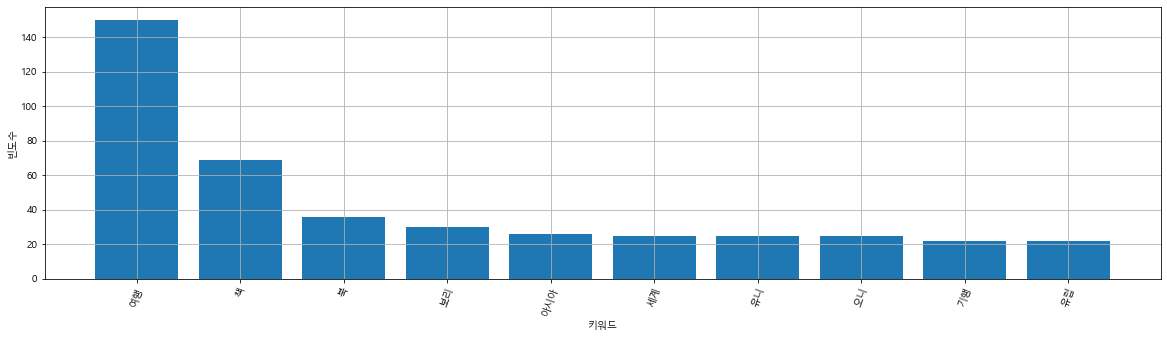

In [141]:
plt.figure(figsize=(20,5)) #그림사이즈를 크게-글자가 겹쳐서안보임
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid()

정렬된명사들=sorted(keyword_dict, key=keyword_dict.get, reverse=True)
#내림차순으로 해야되기떄문에 리버스

#각각의 값들이 갖고있는 카운트값이 필요
정렬된값들 = sorted(keyword_dict.values(), reverse=True)
#print(정렬된값들)
plt.bar(range(len(정렬된명사들[:10])),정렬된값들[:10],align="center")

plt.xticks(range(len(정렬된명사들[:10])),정렬된명사들[:10],rotation=70) #x축에 틱을 달아줌
plt.show()

In [142]:
정렬된명사들[:10]

['여행', '책', '북', '보리', '아시아', '세계', '유니', '오니', '기행', '유럽']

## 막대그래프

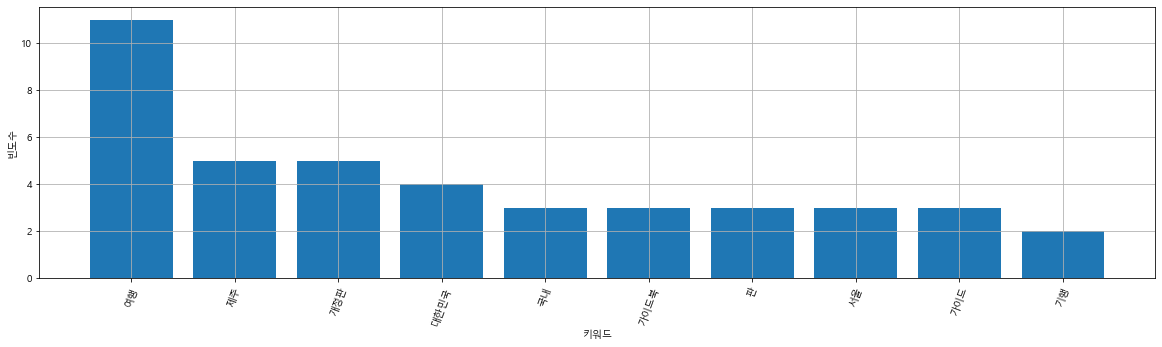

In [143]:

#### dataframe가져오기 ####
df_sample = df_best2021년_여행['도서명']

# 가져온 컬럼을 리스트로 변환
val_list=df_sample.values.tolist()

### 형태소분석(명사로) 하고 keword 리스트에 저장 ###
okt =Okt()
keyword=okt.nouns(' '.join(val_list))

#### 필터링 #####
for word in keyword:
    if word == '양정판':
            # print(i,f'{excp}')
            continue
    elif (word =='돈')or(len(word) > 1):
        two_letter.append(word)

# 갯수별 카운팅하고 딕셔너리로 변환
keyword_dict = dict(Counter(keyword))
keyword_dict
######################################


plt.figure(figsize=(20,5)) #그림사이즈를 크게-글자가 겹쳐서안보임
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid()

정렬된명사들=sorted(keyword_dict, key=keyword_dict.get, reverse=True)
#내림차순으로 해야되기떄문에 리버스

#각각의 값들이 갖고있는 카운트값이 필요
정렬된값들 = sorted(keyword_dict.values(), reverse=True)
#print(정렬된값들)
plt.bar(range(len(정렬된명사들[:10])),정렬된값들[:10],align="center")

plt.xticks(range(len(정렬된명사들[:10])),정렬된명사들[:10],rotation=70) #x축에 틱을 달아줌
plt.show()

In [145]:
df_sample

1                                   나를 부르는 숲
2                              백반기행(식객 허영만의)
3                           백반기행. 2(식객 허영만의)
4                         특별하게 제주(2021~2022)
5                              에이든 국내여행 가이드북
6               자동차 주말여행 코스북(2020)(전면개정판 3판)
7                        리얼 국내여행(2021~2022년)
8                          리얼 제주(2021~2022년)
9             한 끼 식사의 행복: 서울의 소문난 인생 맛집 165곳
10                                 전국일주 가이드북
11                            진짜 프랑스는 시골에 있다
12                            오늘부터 차박캠핑(반양장)
13                          대한민국 트레킹 가이드(2판)
14                      아이랑 제주 여행(2021-2022)
15                                끌림(개정판 2판)
16       만약 우리의 언어가 위스키라고 한다면(양장본 HardCover)
17                        하루쯤 나 혼자 어디라도 가야겠다
18                         송일준 PD 제주도 한 달 살기
19                             에이든 제주여행 가이드북
20                          미쉐린 가이드 서울(2021)
21                대한민국 요즘 여행(2021~2022)(개정판)
22                                 아름다운 사찰여행
23        

In [146]:
####################################################
# "("이후 안가져옴 ex양장본,개정판 등등
val_list2=[]
for i in range(len(val_list)):
    val_list2.append(val_list[i].split('(')[0])
val_list2    
###################################################

['나를 부르는 숲',
 '백반기행',
 '백반기행. 2',
 '특별하게 제주',
 '에이든 국내여행 가이드북',
 '자동차 주말여행 코스북',
 '리얼 국내여행',
 '리얼 제주',
 '한 끼 식사의 행복: 서울의 소문난 인생 맛집 165곳',
 '전국일주 가이드북',
 '진짜 프랑스는 시골에 있다',
 '오늘부터 차박캠핑',
 '대한민국 트레킹 가이드',
 '아이랑 제주 여행',
 '끌림',
 '만약 우리의 언어가 위스키라고 한다면',
 '하루쯤 나 혼자 어디라도 가야겠다',
 '송일준 PD 제주도 한 달 살기',
 '에이든 제주여행 가이드북',
 '미쉐린 가이드 서울',
 '대한민국 요즘 여행',
 '아름다운 사찰여행',
 '대한민국 자동차 캠핑 가이드',
 '바람이 분다 당신이 좋다',
 '우리 땅 더 넓고 더 깊게 여행하는 법',
 '여행의 기술',
 '제주도 여행백서',
 '서울의 맛집',
 '국내여행 버킷리스트 101',
 '요즘 제주']

## 파이그래프




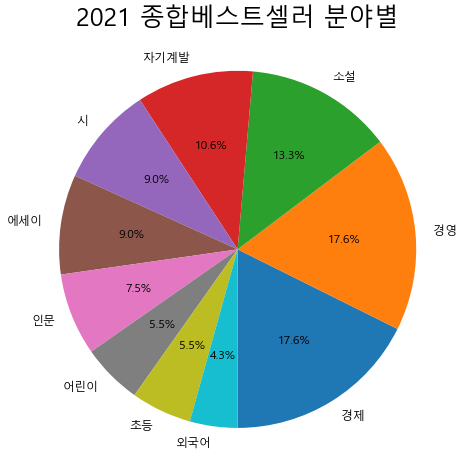

In [13]:
#### dataframe가져오기 ####
df_sample = df_best2021년_분야_종합['분야']

# 가져온 컬럼을 리스트로 변환
val_list=df_sample.values.tolist()

### 형태소분석(명사로) 하고 keword 리스트에 저장 ###
okt =Okt()
keyword=okt.nouns(' '.join(val_list))

# 갯수별 카운팅하고 딕셔너리로 변환
keyword_dict = dict(Counter(keyword))
keyword_dict



plt.figure(figsize=(8,8))
plt.title("2021 종합베스트셀러 분야별",fontsize=25)
plt.axis('equal') 
plt.grid()

정렬된명사들=sorted(keyword_dict, key=keyword_dict.get, reverse=True)
#내림차순으로 해야되기떄문에 리버스

#각각의 값들이 갖고있는 카운트값이 필요
정렬된값들 = sorted(keyword_dict.values(), reverse=True)
#print(정렬된값들)
plt.pie(정렬된값들[:10],labels=정렬된명사들[:10], autopct="%.1f%%",textprops={'size': 12},startangle=270) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #startangle=각도

plt.show()

## 꺽은선 그래프

In [54]:


#### dataframe가져오기 ####
df_sample0 = df_best2018년_분야_종합['분야']
df_sample1 = df_best2019년_분야_종합['분야']
df_sample2 = df_best2020년_분야_종합['분야']
df_sample3 = df_best2021년_분야_종합['분야']


list_bs=[df_sample0,df_sample1,df_sample2,df_sample3]
list_y=['18','19','20','21']

for df_sample,d in zip(list_bs,list_y):
    # 가져온 컬럼을 리스트로 변환
    val_list=df_sample.values.tolist()


    # "("이후 안가져옴 ex양장본,개정판 등등
    val_list2=[]
    for i in range(len(val_list)):
        val_list2.append(val_list[i].split('(')[0])

    excp=['']

    two_letter = []
    for word in keyword:
        if word in excp:
                # print(i,f'{excp}')
                continue
        elif (word =='돈')or(len(word) > 1):
            two_letter.append(word)
    # print(type(Counter(val_list2)))

    # 갯수별 카운팅하고 딕셔너리로 변환
    globals()['keyword_dict_{}all'.format(d)] = dict(Counter(val_list2))
    print(d)
    


######################################

# listr[3]
# print(keyword_dict_21all)
# print(keyword_dict_20all)
# print(keyword_dict_19all)
# print(keyword_dict_18all)
keyword_dict_18all.keys()

18
19
20
21


dict_keys(['시/에세이', '소설', '역사/문화', '자기계발', '인문', '정치/사회', '외국어', '경제/경영', '어린이', '과학', '가정/육아', '만화', '유아', '종교', '요리'])

In [113]:
### 각 년도별 df에서 name 컬럼 추출 ###
df_best18_all=pd.DataFrame(list(keyword_dict_18all.items()),columns=['name','2018'])
df_best19_all=pd.DataFrame(list(keyword_dict_19all.items()),columns=['name','2019'])
df_best20_all=pd.DataFrame(list(keyword_dict_20all.items()),columns=['name','2020'])
df_best21_all=pd.DataFrame(list(keyword_dict_21all.items()),columns=['name','2021'])

### 추출한 컬럼 한 표로 합치고 결측치 0으로 채우기 ###
df_OUTER_JOIN = pd.merge(df_best18_all, df_best19_all, left_on='name', right_on='name', how='outer')
df_OUTER_JOIN2 = pd.merge(df_best20_all,df_best21_all, left_on='name', right_on='name', how='outer')
df_OUTER_JOIN3 = pd.merge(df_OUTER_JOIN,df_OUTER_JOIN2, left_on='name', right_on='name', how='outer').fillna(0)
df_OUTER_JOIN3

### 컬럼명 지정 후, 실수값 -> 정수값 ###
cols = ['2018', '2019', '2020', '2021']
df_OUTER_JOIN3[cols] = df_OUTER_JOIN3[cols].applymap(np.int64)
df_OUTER_JOIN3
##########################
#합계 구하기
# df_OUTER_JOIN3.sum(axis=1)
df_OUTER_JOIN4 = df_OUTER_JOIN3
##########################
# # 합계 구하기
df_OUTER_JOIN4["sum"] = df_OUTER_JOIN4.sum(axis=1)
df_OUTER_JOIN4 = df_OUTER_JOIN4.sort_values(by=["sum"], ascending=False,ignore_index=True)
df_OUTER_JOIN4

C:\Users\sw\AppData\Local\Temp/ipykernel_5224/3722692504.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_OUTER_JOIN4["sum"] = df_OUTER_JOIN4.sum(axis=1)


,name,2018,2019,2020,2021,sum
0,소설,42,34,32,34,142
1,시/에세이,40,38,31,23,132
2,경제/경영,22,28,35,45,130
3,인문,25,30,28,19,102
4,자기계발,20,17,26,27,90
5,외국어,19,17,12,11,59
6,어린이,9,12,13,14,48
7,역사/문화,8,6,2,4,20
8,과학,4,3,4,2,13
9,정치/사회,2,2,4,5,13


In [172]:
index_n=len(df_OUTER_JOIN4.index)
top_n=7
df_top=df_OUTER_JOIN4[['name','sum']].head(top_n)
df_buttom=df_OUTER_JOIN4[['name','sum']].tail(index_n-top_n)
#sum 
df_buttom2 = pd.DataFrame([['기타',0]],columns=['name','sum'])
df_buttom2['sum']=df_buttom['sum'].sum()
df_best = pd.concat([df_top, df_buttom2],ignore_index=True)
df_best 

,name,sum
0,소설,142
1,시/에세이,132
2,경제/경영,130
3,인문,102
4,자기계발,90
5,외국어,59
6,어린이,48
7,기타,97


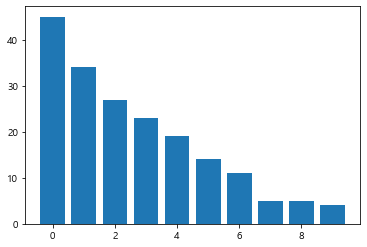

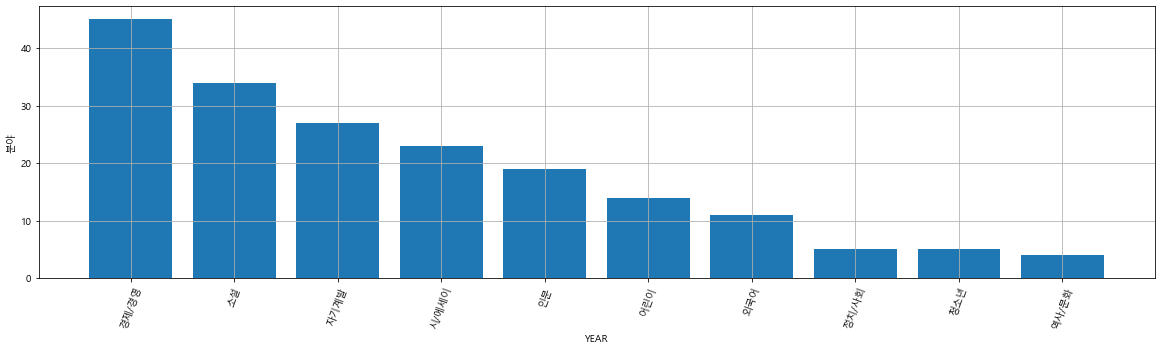

In [84]:
barWidth = 0.4
plt.bar(range(len(정렬된명사들[:10])),정렬된값들[:10],align="center")
plt.figure(figsize=(20,5)) #그림사이즈를 크게-글자가 겹쳐서안보임
plt.xlabel("YEAR")
plt.ylabel("분야")
plt.grid()

정렬된명사들=sorted(keyword_dict, key=keyword_dict.get, reverse=True)
#내림차순으로 해야되기떄문에 리버스

#각각의 값들이 갖고있는 카운트값이 필요
정렬된값들 = sorted(keyword_dict.values(), reverse=True)
#print(정렬된값들)
plt.bar(range(len(정렬된명사들[:10])),정렬된값들[:10],align="center")

plt.xticks(range(len(정렬된명사들[:10])),정렬된명사들[:10],rotation=70) #x축에 틱을 달아줌
plt.show()

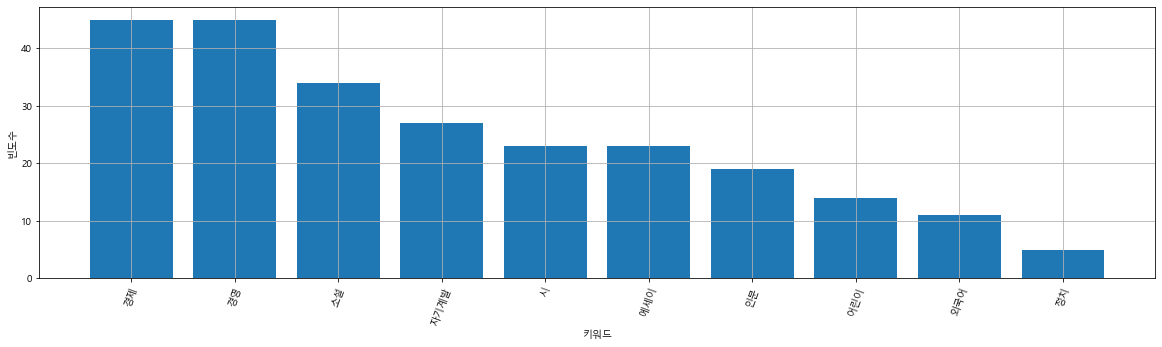

In [12]:
plt.figure(figsize=(20,5)) #그림사이즈를 크게-글자가 겹쳐서안보임
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid()

정렬된명사들=sorted(keyword_dict_21all, key=keyword_dict_21all.get, reverse=True)
#내림차순으로 해야되기떄문에 리버스

#각각의 값들이 갖고있는 카운트값이 필요
정렬된값들 = sorted(keyword_dict_21all.values(), reverse=True)
#print(정렬된값들)
plt.bar(range(len(정렬된명사들[:10])),정렬된값들[:10],align="center")

plt.xticks(range(len(정렬된명사들[:10])),정렬된명사들[:10],rotation=70) #x축에 틱을 달아줌
plt.show()

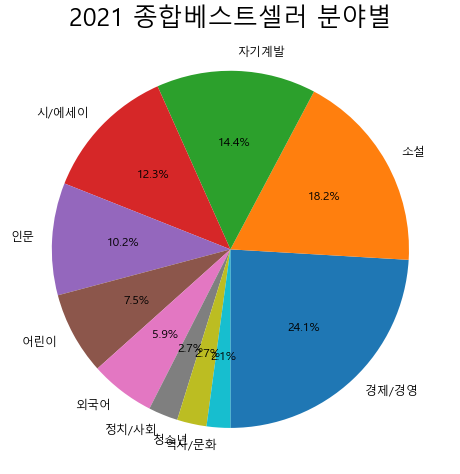

In [155]:
plt.figure(figsize=(8,8))
plt.title("2021 종합베스트셀러 분야별",fontsize=25)
plt.axis('equal') 
plt.grid()

정렬된명사들=sorted(keyword_dict_21all, key=keyword_dict_21all.get, reverse=True)
#내림차순으로 해야되기떄문에 리버스

#각각의 값들이 갖고있는 카운트값이 필요
정렬된값들 = sorted(keyword_dict_21all.values(), reverse=True)
#print(정렬된값들)
plt.pie(정렬된값들[:10],labels=정렬된명사들[:10], autopct="%.1f%%",textprops={'size': 12},startangle=270) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #startangle=각도

plt.show()

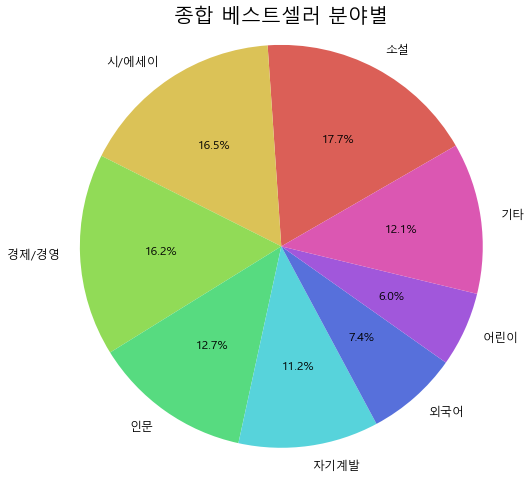

In [175]:
### 파이차트 ###
import seaborn as sns
plt.figure(figsize=(8,8))

plt.title("종합 베스트셀러 분야별",fontsize=20)
plt.axis('equal') 

name_b=df_best['name'].tolist()
sum_b=df_best['sum'].values.tolist()

colors = sns.color_palette('hls',len(name_b)) 
 

plt.pie(sum_b,labels=name_b, autopct="%.1f%%",
        textprops={'size': 12},startangle=30,
        colors = colors ## 색상 지정
       ) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #startangle=각도

plt.axis('equal') 
plt.savefig("pi_rank_genre_21.png",dpi=150) 
plt.show()

In [181]:
df_OUTER_JOIN4.head(6)

,name,2018,2019,2020,2021,sum
0,소설,42,34,32,34,142
1,시/에세이,40,38,31,23,132
2,경제/경영,22,28,35,45,130
3,인문,25,30,28,19,102
4,자기계발,20,17,26,27,90
5,외국어,19,17,12,11,59


In [263]:
ylabel=df_OUTER_JOIN4.loc[0].tolist()[:-1]
ylabel
# len(df_OUTER_JOIN4.index)

['소설', 42, 34, 32, 34]

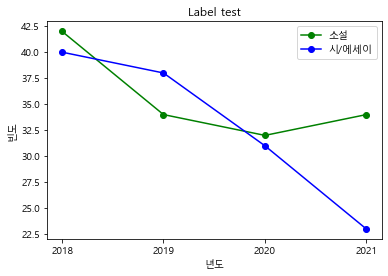

In [200]:
## 꺽은선 그래프

xlabel=df_OUTER_JOIN4.columns[1:-1].tolist()

ylabel0=df_OUTER_JOIN4.loc[0].tolist()[:-1]
ylabel1=df_OUTER_JOIN4.loc[1].tolist()[:-1]

plt.plot(xlabel,ylabel0[1:],"go-",label=ylabel0[0]) #,label="graph1" :레전드
plt.plot(xlabel,ylabel1[1:],"bo-",label=ylabel1[0])
plt.xlabel("년도") #라벨안쪽에는 한그이 들어가면 글자꺠짐(폰트 없을때)
plt.ylabel("빈도")

plt.title("Label test")
plt.legend()  #p304 :레전드 - 라벨들을(라벨이있다면) 표시한다.

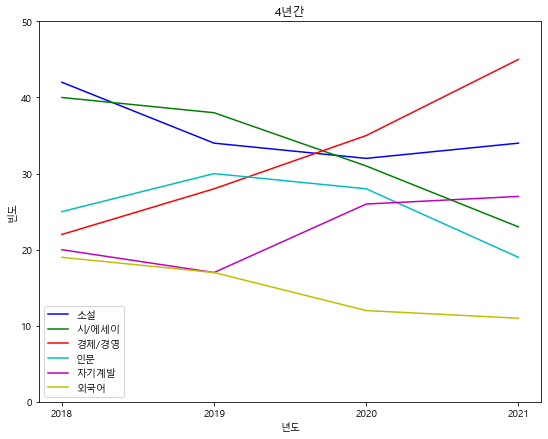

In [262]:
############ 꺽은선 ##############
### x라벨 컬럼명에서 년도 가져오기
xlabel=df_OUTER_JOIN4.columns[1:-1].tolist()

### y라벨 만들기 갯수만큼
ix_n=len(df_OUTER_JOIN4.head(6).index)
ylabel_list=[]

for d in range(ix_n):
    globals()['ylabel_{}'.format(str(d))] = df_OUTER_JOIN4.loc[d].tolist()[:-1]
    ylabel_list.append('ylabel_{}'.format(str(d)))


plt.figure(figsize=(9,7))
# plt.grid(axis='x')
plt.plot(xlabel,ylabel_0[1:],"b-",label=ylabel_0[0])
plt.plot(xlabel,ylabel_1[1:],"g-",label=ylabel_1[0])
plt.plot(xlabel,ylabel_2[1:],"r-",label=ylabel_2[0])
plt.plot(xlabel,ylabel_3[1:],"c-",label=ylabel_3[0])
plt.plot(xlabel,ylabel_4[1:],"m-",label=ylabel_4[0])
plt.plot(xlabel,ylabel_5[1:],"y-",label=ylabel_5[0])

 
plt.xlabel("년도") 
plt.ylabel("빈도")
# plt.xlim(0,0)
plt.ylim(0,50)
plt.title("4년간")
plt.legend(loc=3)

In [215]:
ylabel_5

['외국어', 19, 17, 12, 11]

In [217]:
ylabel_list

['ylabel_0', 'ylabel_1', 'ylabel_2', 'ylabel_3', 'ylabel_4', 'ylabel_5']